In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [80]:
rng = np.random.default_rng()

In [81]:
df = pd.read_csv('standings2.csv')
df = df.set_index("Team")
df

,Balancing,Halfpipe,Funnel Endurance,Newton's Cradle,Long Jump,5 Meter Hurdles,Block Pushing,Triathlon,Sand Mogul Race,5m Sprint,Black Hole Funnel,Event 12,Event 13,Event 14,Event 15,Event 16
Team,,,,,,,,,,,,,,,,
O'rangers,6,25,20,25,4,10,15,15,4,6,10,NaN,NaN,NaN,NaN,NaN
Minty Maniacs,25,15,25,10,8,8,2,6,15,25,0,NaN,NaN,NaN,NaN,NaN
Midnight Wisps,15,12,5,11,5,20,25,10,6,5,20,NaN,NaN,NaN,NaN,NaN
Crazy Cat's Eyes,11,20,10,12,25,12,9,4,9,4,15,NaN,NaN,NaN,NaN,NaN
Savage Speeders,2,1,15,7,12,15,12,9,12,15,25,NaN,NaN,NaN,NaN,NaN
Raspberry Racers,20,7,7,15,1,25,10,5,5,12,1,NaN,NaN,NaN,NaN,NaN
Hazers,9,8,6,9,6,7,0,25,20,11,3,NaN,NaN,NaN,NaN,NaN
Team Galactic,1,11,2,20,9,11,11,11,7,9,11,NaN,NaN,NaN,NaN,NaN
Team Momo,10,10,0,5,8,4,20,20,10,2,7,NaN,NaN,NaN,NaN,NaN


In [82]:
poss_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 25]

In [83]:
# ranks = pd.DataFrame(index = df.index)
# scores = pd.DataFrame(index = df.index)
# firstPlaceHistories = pd.DataFrame(index = df.index)

# ranks = pd.read_pickle("ranks.pkl")
# scores = pd.read_pickle("scores.pkl") 

In [84]:
# def fillDf(oldDf):
#     filledDf = oldDf.copy()
#     for col in oldDf.columns[oldDf.isna().any()]:
#         rng.shuffle(poss_scores)
#         filledDf[col] = poss_scores
#     filledDf["sum"] = filledDf.sum(axis=1)
#     filledDf["rank"] = filledDf["sum"].rank(ascending=False)
#     return filledDf

In [85]:
def fillDfEfficient(oldDf, iterations, scoresDf, ranksDf, firstPlaceDf):
    numColsBlank = len(oldDf.columns[oldDf.isna().any()])
    numColsFilled = 16 - numColsBlank

    for i in range(iterations):
        if i % 100 == 0:
            print("Iteration", i)

        filledDf = oldDf.copy()

        for col in oldDf.columns[numColsFilled:]:
            rng.shuffle(poss_scores)
            filledDf[col] = poss_scores
        scoresDf[i] = filledDf.sum(axis=1)
        ranksDf[i] = filledDf.sum(axis=1).rank(ascending=False)

        for colToIgnore in range(numColsFilled, -1, -1):
            rng.shuffle(poss_scores)
            filledDf.iloc[:, colToIgnore] = poss_scores
            scores = filledDf.sum(axis=1)
            bestTeam = scores.idxmax()
            firstPlaceDf.loc[bestTeam, colToIgnore] += 1
            # try:
            #     if pd.isna(firstPlaceDf.loc[bestTeam, colToIgnore]):
            #         firstPlaceDf.loc[bestTeam, colToIgnore] = 1
            #     else:
            #         firstPlaceDf.loc[bestTeam, colToIgnore] += 1
            # except KeyError:
            #     firstPlaceDf.loc[bestTeam, colToIgnore] = 1


In [86]:
ranks = pd.DataFrame(index = df.index)
scores = pd.DataFrame(index = df.index)
firstPlaceHistories = pd.DataFrame(index = df.index)

for colToIgnore in range(numColsFilled + 1):
    firstPlaceHistories.loc[df.index[0], colToIgnore] = 0

firstPlaceHistories = firstPlaceHistories.fillna(0)

iterations = 150000
fillDfEfficient(df, iterations, scores, ranks, firstPlaceHistories)

ation 28100
Iteration 28200
Iteration 28300
Iteration 28400
Iteration 28500
Iteration 28600
Iteration 28700
Iteration 28800
Iteration 28900
Iteration 29000
Iteration 29100
Iteration 29200
Iteration 29300
Iteration 29400
Iteration 29500
Iteration 29600
Iteration 29700
Iteration 29800
Iteration 29900
Iteration 30000
Iteration 30100
Iteration 30200
Iteration 30300
Iteration 30400
Iteration 30500
Iteration 30600
Iteration 30700
Iteration 30800
Iteration 30900
Iteration 31000
Iteration 31100
Iteration 31200
Iteration 31300
Iteration 31400
Iteration 31500
Iteration 31600
Iteration 31700
Iteration 31800
Iteration 31900
Iteration 32000
Iteration 32100
Iteration 32200
Iteration 32300
Iteration 32400
Iteration 32500
Iteration 32600
Iteration 32700
Iteration 32800
Iteration 32900
Iteration 33000
Iteration 33100
Iteration 33200
Iteration 33300
Iteration 33400
Iteration 33500
Iteration 33600
Iteration 33700
Iteration 33800
Iteration 33900
Iteration 34000
Iteration 34100
Iteration 34200
Iteration 34

In [87]:
firstPlaceHistories = firstPlaceHistories/iterations

In [88]:
numColsBlank = len(df.columns[df.isna().any()])
numColsFilled = 16 - numColsBlank
numColsFilled

11

In [89]:
# for i in range(50000):
#     if i % 500 == 0:
#         print(i)

#     scenario = fillDf(df)

#     scores[i] = scenario["sum"]
#     ranks[i] = scenario["rank"]

In [90]:
ranks.to_pickle("ranks.pkl")
scores.to_pickle("scores.pkl")

In [91]:
ranks

,0,1,2,3,4,5,6,7,8,9,...,149990,149991,149992,149993,149994,149995,149996,149997,149998,149999
Team,,,,,,,,,,,,,,,,,,,,,
O'rangers,2.0,1.0,1.0,3.0,2.0,1.0,5.0,2.5,1.0,5.0,...,4.0,1.5,7.0,3.0,3.0,3.0,3.5,6.5,4.5,2.0
Minty Maniacs,3.0,2.0,2.5,4.0,1.0,2.0,3.0,1.0,5.0,2.0,...,1.0,4.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0
Midnight Wisps,6.0,3.0,5.0,1.0,6.0,3.0,1.0,4.0,3.0,6.0,...,5.0,1.5,3.0,4.0,1.0,2.0,1.0,2.5,2.0,5.0
Crazy Cat's Eyes,1.0,8.0,6.0,5.0,7.0,7.0,2.0,6.0,8.0,3.0,...,3.0,5.0,2.0,5.0,4.5,4.0,3.5,6.5,3.0,3.0
Savage Speeders,4.0,6.0,7.0,2.0,5.0,6.0,4.0,2.5,2.0,1.0,...,2.0,3.0,5.0,6.0,4.5,5.0,8.0,2.5,4.5,6.0
Raspberry Racers,7.5,10.0,8.0,9.5,4.0,4.0,7.0,5.0,10.0,7.0,...,6.0,7.0,6.0,1.0,6.0,6.0,9.0,5.0,8.0,4.0
Hazers,5.0,5.0,4.0,6.0,3.0,8.0,8.0,10.0,6.0,10.0,...,9.0,11.0,4.0,9.0,7.0,12.0,7.0,4.0,9.0,8.0
Team Galactic,7.5,7.0,9.0,8.0,9.0,5.0,9.0,9.0,4.0,9.0,...,7.5,8.0,8.0,7.0,8.0,11.0,5.0,9.0,11.0,7.0
Team Momo,9.5,11.0,2.5,11.0,12.0,11.0,6.0,7.5,7.0,4.0,...,10.0,6.0,9.0,8.0,10.0,7.0,6.0,8.0,6.0,12.0


O'rangers
Minty Maniacs
Midnight Wisps
Crazy Cat's Eyes
Savage Speeders
Raspberry Racers
Hazers
Team Galactic
Team Momo
Oceanics
Thunderbolts
Balls of Chaos
Green Ducks
Bumblebees
Hornets
Mellow Yellow


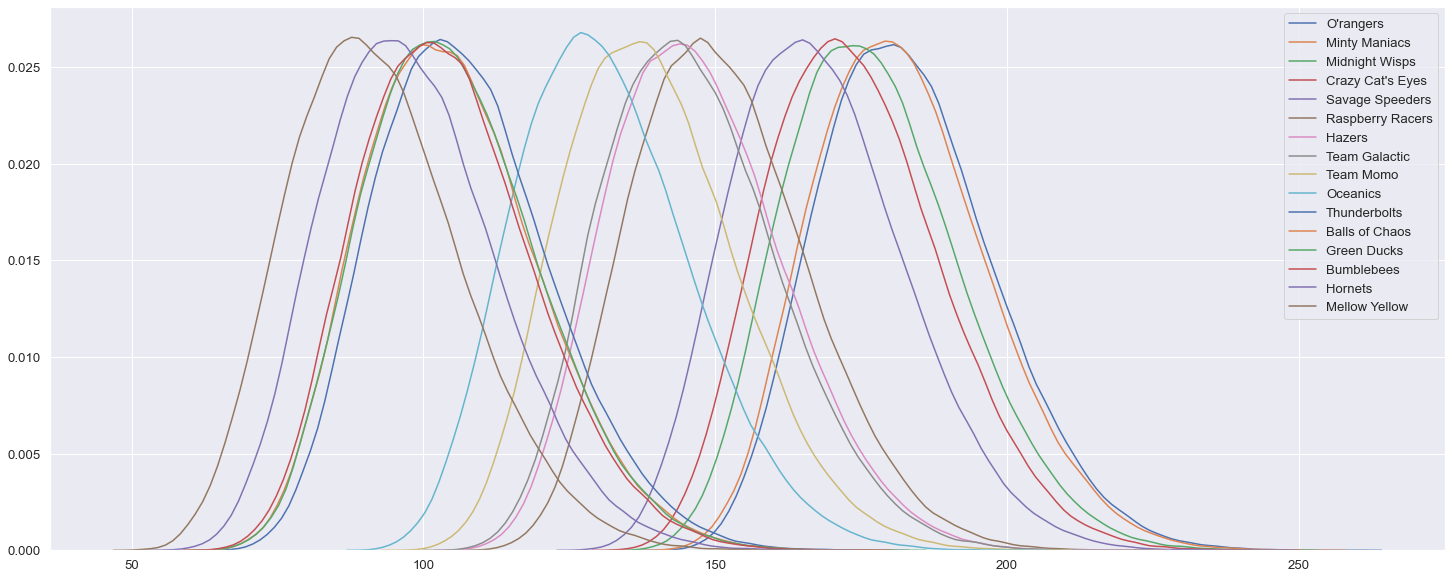

In [92]:
plt.figure(figsize=(25,10))
for idx, row in scores.iterrows():
    print(idx)
    sns.kdeplot(row, label = idx)
plt.legend()
plt.savefig("scores_hist.png")
plt.show()

In [93]:
# plt.figure(figsize=(25,10))
# for idx, row in ranks.iterrows():
#     print(idx)
#     sns.distplot(row, label = idx, kde = False, bins = range(1,18))
# plt.legend()
# plt.savefig("ranks_hist.png")
# plt.show()

In [94]:

# rankCounts = pd.DataFrame(df["Team"])
# rankCounts = rankCounts.set_index("Team")
# for i in range(1, 17):
#     print(i)
#     rankCounts[str(i)] = ranks[(i <= ranks) & (ranks < i+1)].count(axis = 1)
# rankCounts


In [95]:
# sns.set()
# plt.figure(figsize=(25,15))
# rankCounts2 = rankCounts2/500
# sns.heatmap(rankCounts2, annot = True)
# plt.show()

In [96]:
rankHeatmap = pd.DataFrame(index = df.index)
for idx, row in ranks.iterrows():
    counts = row.value_counts(normalize = True)
    for i in range(1, 17):
        rankHeatmap.loc[idx, i] = counts[(counts.index >= i) & (counts.index < i+1)].sum()
rankHeatmap

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Team,,,,,,,,,,,,,,,,
O'rangers,0.304220,0.239867,0.187853,0.135913,0.082740,0.036500,0.010567,0.002073,0.000267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minty Maniacs,0.281280,0.235513,0.191433,0.143420,0.090853,0.041053,0.013060,0.002900,0.000453,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Midnight Wisps,0.186853,0.195960,0.191347,0.176453,0.133773,0.074013,0.030293,0.009533,0.001580,0.000187,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000
Crazy Cat's Eyes,0.144107,0.167713,0.180140,0.182547,0.158640,0.099873,0.046547,0.016400,0.003567,0.000453,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000
Savage Speeders,0.083593,0.111040,0.140593,0.170460,0.194073,0.152740,0.090460,0.041547,0.012967,0.002367,0.000133,0.000027,0.000000,0.000000,0.000000,0.000000
Raspberry Racers,0.013173,0.026173,0.043000,0.066887,0.107873,0.174620,0.196960,0.173900,0.119733,0.059260,0.015380,0.002693,0.000307,0.000040,0.000000,0.000000
Hazers,0.007320,0.017113,0.030153,0.048733,0.082780,0.142780,0.185540,0.193213,0.159233,0.094153,0.030427,0.007313,0.001093,0.000147,0.000000,0.000000
Team Galactic,0.006933,0.014707,0.026940,0.044713,0.077607,0.134000,0.182507,0.195347,0.168173,0.103600,0.035007,0.008680,0.001580,0.000193,0.000013,0.000000
Team Momo,0.002813,0.006473,0.012100,0.023173,0.044240,0.086127,0.134807,0.176187,0.212707,0.178120,0.083167,0.029760,0.008320,0.001747,0.000247,0.000013


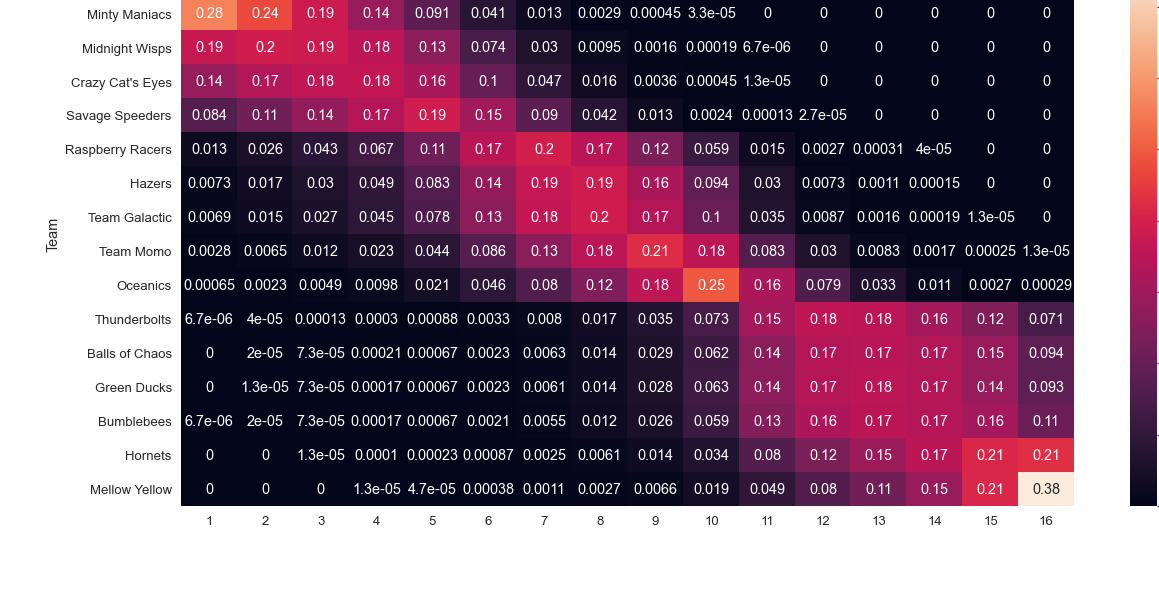

In [97]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.2)
plt.title("Heatmap of Placement Probabilities")
plt.xlabel("Rank")
sns.heatmap(rankHeatmap, annot = True)
plt.savefig("rankHeatmap.png", dpi = 200, facecolor = 'white', transparent = False)
plt.show()

In [98]:
# def fillDfFixed(oldDf, colsToLeave):
#     filledDf = oldDf.copy()
#     for col in oldDf.columns[colsToLeave:]:
#         rng.shuffle(poss_scores)
#         filledDf[col] = poss_scores
#     filledDf["sum"] = filledDf.sum(axis=1)
#     filledDf["rank"] = filledDf["sum"].rank(ascending=False)
#     return filledDf

In [99]:
# firstPlaceHistories = pd.DataFrame(index = df.index)
# for eventsToIgnore in range(0, numColsFilled + 1):
#     ranks = pd.DataFrame(index = df.index)
#     print(f"Keeping {eventsToIgnore} event(s)")

#     for i in range(25000):
#         if i % 500 == 0:
#             print(i)
#         scenario = fillDfFixed(df, eventsToIgnore)
#         ranks[i] = scenario["rank"]
    
#     for idx, row in ranks.iterrows():
#         counts = row.value_counts(normalize = True)
#         firstPlaceHistories.loc[idx, eventsToIgnore] = counts[counts.index < 2].sum()




In [100]:
# print(colorDict)
colorDict = {
    'Minty Maniacs': "#429e9d",
    "O'rangers": "#fd6a02",
    "Crazy Cat's Eyes": "green",
    'Raspberry Racers': "#e30b5d",
    'Midnight Wisps': "#02075d",
    'Team Galactic': "#7F00FF",
    'Savage Speeders': "#800000",
    'Balls of Chaos': "#cc7722",
    'Hazers': "grey",
    'Bumblebees': "#f1b82d",
    'Team Momo': "#1C004D",
    'Green Ducks': "#228c22",
    'Thunderbolts': "blue",
    'Hornets': "#9acd32",
    'Oceanics': "#265b5f",
    'Mellow Yellow': "#ffd300"
}

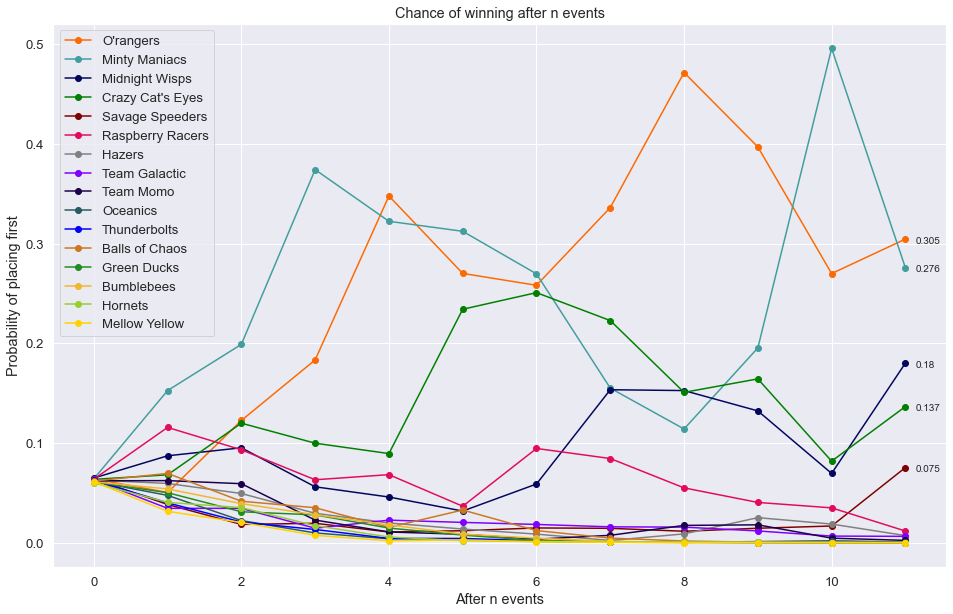

In [101]:
plt.figure(figsize = (16, 10))
sns.set(font_scale=1.2)
# colorDict = {}
for idx, row in firstPlaceHistories.iterrows():
    # colorDict[idx] = "#000000"
    plt.plot(range(numColsFilled + 1), row, label = idx, marker = 'o', color = colorDict[idx])
for idx, row in list(firstPlaceHistories.iterrows())[:5]:
    plt.annotate(round(row[numColsFilled], 3), (numColsFilled, row[numColsFilled]), ha="left", textcoords="offset points", xytext=(10,-4), fontsize = 'x-small')
plt.title("Chance of winning after n events")
plt.ylabel("Probability of placing first")
plt.xlabel("After n events")
plt.legend()
plt.savefig("rankHistory.png", dpi = 200)
plt.show()

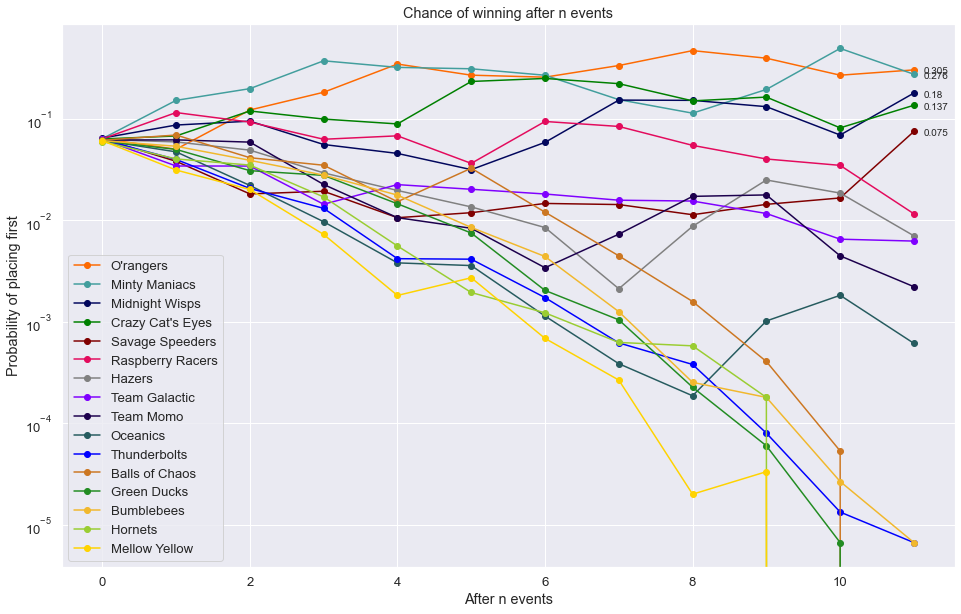

In [104]:
plt.figure(figsize = (16, 10))
plt.yscale("log")
sns.set(font_scale=1.2)
# colorDict = {}
for idx, row in firstPlaceHistories.iterrows():
    # colorDict[idx] = "#000000"
    plt.plot(range(numColsFilled + 1), row, label = idx, marker = 'o', color = colorDict[idx])
for idx, row in list(firstPlaceHistories.iterrows())[:5]:
    plt.annotate(round(row[numColsFilled], 3), (numColsFilled, row[numColsFilled]), ha="left", textcoords="offset points", xytext=(10,-4), fontsize = 'x-small')
plt.title("Chance of winning after n events")
plt.ylabel("Probability of placing first")
plt.xlabel("After n events")
plt.legend()
plt.savefig("rankHistoryLog.png", dpi = 200)
plt.show()

In [102]:
# g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "x")

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)